In [115]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

[(50, 400), (100, 300), (150, 220), (200, 160), (250, 120), (320, 100)]


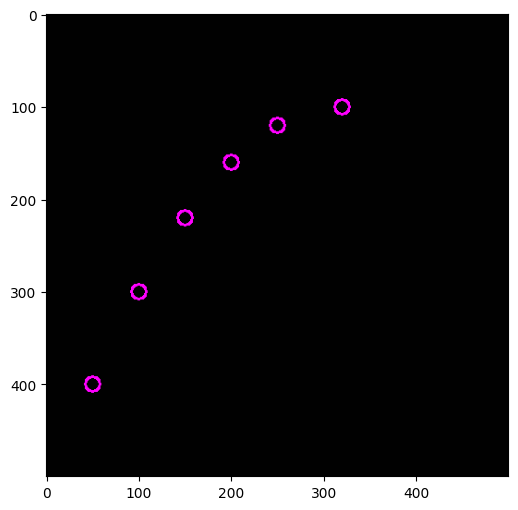

In [112]:
# Improved Kalman Filter Example
import random


# Initialization
dt = 0.01
process_noise_cov = 0.1
measurement_noise_cov = 0.5
error_cov_post = 0.2
error_cov_pre = 0.1
kalman_2d = cv2.KalmanFilter(4, 2)
kalman_2d.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman_2d.transitionMatrix = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman_2d.processNoiseCov = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32) * process_noise_cov
kalman_2d.measurementNoiseCov = np.array([[1, 0], [0, 1]], np.float32) * measurement_noise_cov
kalman_2d.errorCovPost = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32) * error_cov_post
kalman_2d.errorCovPre = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32) * error_cov_pre        
x=50
y=400
kalman_2d.statePre = np.array([x, y, 0, 0], np.float32)
kalman_2d.statePost = np.array([x, y, 0, 0], np.float32)


# Parameters for the parabola
a = 0.01  # Steepness
h, k = 250, 250  # Vertex adjusted to center the parabola in the image
x_values = np.linspace(50, 450, 5)  # X-coordinates

# Generate the corresponding Y-coordinates
y_values = a * (x_values - h) ** 2 + k

# Clip values to ensure all coordinates fit within the image bounds
x_values = np.clip(x_values, 0, 499)
y_values = np.clip(y_values, 0, 499)

# Combine X and Y into an array of positions
ball_positions = [    (50, 400),    (100, 300),    (150, 220),    (200, 160),    (250, 120),   (320, 100),  ]

print(ball_positions)
image = np.ones((500, 500, 3), dtype="uint8")

for i,coord in enumerate(ball_positions):
    # Predict
    predicted = kalman_2d.predict()
    predicted_x, predicted_y = int(predicted[0]), int(predicted[1])
    
    # Correct
    if i<=3:
        kalman_2d.correct(np.array([[np.float32(coord[0])], [np.float32(coord[1])]]))

    # Visualization
    cv2.circle(image, (int(coord[0]), int(coord[1])), 8, (255, 0, 255), 2)  # Measured position
    #cv2.circle(image, (predicted_x, predicted_y), 8, (0, 0, 255), 2)        # Predicted position

plt.figure(figsize=(10, 6))
plt.imshow(image)

pred coords 134 257
pred coords 134 256
pred coords 134 256
pred coords 134 256
pred coords 134 256


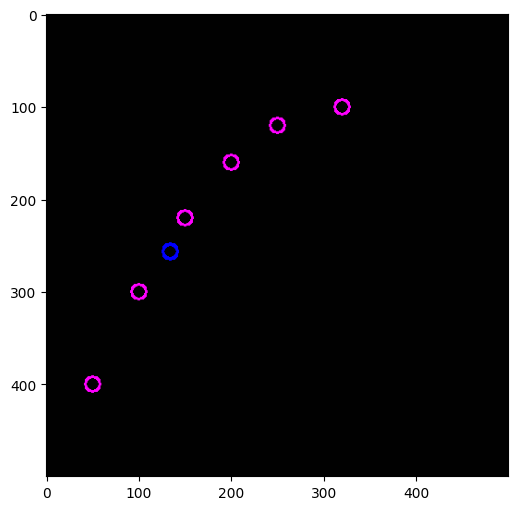

In [113]:
# predict few more states now
for i in range(5):
    predicted = kalman_2d.predict()
    predicted_x, predicted_y = int(predicted[0]), int(predicted[1])
    cv2.circle(image, (predicted_x, predicted_y), 8, (0, 0, 255), 2)        # Predicted position
    print("pred coords",predicted_x,predicted_y)
plt.figure(figsize=(10, 6))
plt.imshow(image)

In [141]:
ball_positions = [(50, 400), (100, 300), (150, 220), None, (250, 120), (320, 100),None,None]

# Create a DataFrame
df_ball_positions = pd.DataFrame(ball_positions, columns=["x", "y"])
# Interpolate missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()


In [142]:
df_ball_positions.head(9)

,x,y
0,50.0,400.0
1,100.0,300.0
2,150.0,220.0
3,200.0,170.0
4,250.0,120.0
5,320.0,100.0
6,320.0,100.0
7,320.0,100.0


In [143]:

ball_pos = list(df_ball_positions.itertuples(index=False, name=None))

print(ball_pos)




[(50.0, 400.0), (100.0, 300.0), (150.0, 220.0), (200.0, 170.0), (250.0, 120.0), (320.0, 100.0), (320.0, 100.0), (320.0, 100.0)]


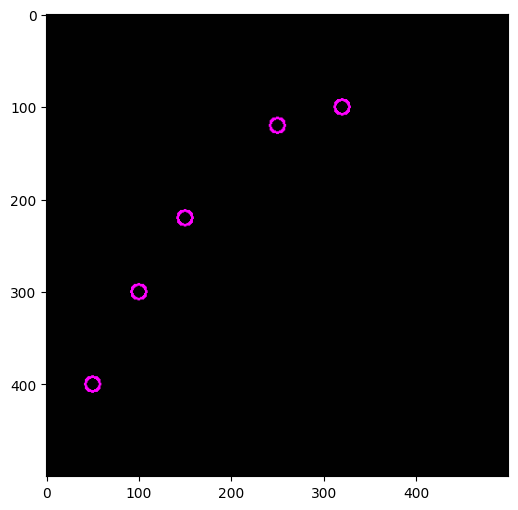

In [144]:
image = np.ones((500, 500, 3), dtype="uint8")
for i,coord in enumerate(ball_positions):
        # Visualization
    if not coord==None:
        cv2.circle(image, (int(coord[0]), int(coord[1])), 8, (255, 0, 255), 2)  # Measured position
    #cv2.circle(image, (predicted_x, predicted_y), 8, (0, 0, 255), 2)        # Predicted position

plt.figure(figsize=(10, 6))
plt.imshow(image)

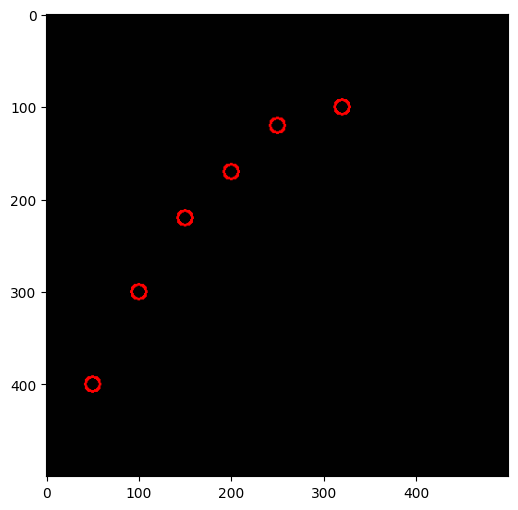

In [145]:
image = np.ones((500, 500, 3), dtype="uint8")
for i,coord in enumerate(ball_pos):
        # Visualization
    cv2.circle(image, (int(coord[0]), int(coord[1])), 8, (255, 0, 0), 2)  # Measured position
    #cv2.circle(image, (predicted_x, predicted_y), 8, (0, 0, 255), 2)        # Predicted position

plt.figure(figsize=(10, 6))
plt.imshow(image)